<center>
    <h1> Laboratorio 2 Estadística Computacional </h1>
    <h3> Nicolás Rosas, 201573608-1, Malla Nueva </h3>
    <h3> María José Apolo, 201573509-3, Malla Nueva </h3>
    <h4> _julio 2018_ </h4>
</center>

### 1- Ley de los Grandes Números

1) Calcule la probabilidad teórica de que k = 80, 100, 120 clientes frecuenten la tienda.

In [22]:
#Todas las librerias que se utilizarán 
import scipy.stats as stats
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import statsmodels.api as sm
from math import sqrt, log
from scipy.special import polygamma
from IPython.display import Latex



In [23]:
k1 = 80
k2 = 100
k3 = 120
lamb = 100

pmf_1 = round(stats.poisson.pmf(k1,lamb),4)
pmf_2 = round(stats.poisson.pmf(k2,lamb),4)
pmf_3 = round(stats.poisson.pmf(k3,lamb),4)


- La probabilidad de que {{k1}} clientes frecuenten la tienda es de {{pmf_1}}
- La probabilidad de que {{k2}} clientes frecuenten la tienda es de {{pmf_2}}
- La probabilidad de que {{k3}} clientes frecuenten la tienda es de {{pmf_3}}

2) Genere 4 muestras de dicha distribución de Poisson con tamaños n = 5, 100, 5000 y 10000.

In [32]:
S1= np.random.poisson(lamb, 5)
S2= np.random.poisson(lamb,100)
S3= np.random.poisson(lamb,5000)
S4= np.random.poisson(lamb,10000)


- Muestra de n=5 : {{S1}}
- Muestra de n=100 : {{S2}}
- Muestra de n=5000 : {{S3}}
- Muestra de n=10000 : {{S4}}

3) Para cada muestra generada determinar la probabilidad empírica de que k = 80, 100, 120 clientes frecuenten la tienda. Explique las discrepancias obtenidas en el inciso número 1.

In [33]:
def pEmp (S, k):              #funcion que calcula la probabilidad de k en S de tamaño n
    ocurrencias = 0           #cantidad de ocurrencias de k en S
    n = len(S)
    for i in S:
        if (i==k):
            ocurrencias+=1
    return (ocurrencias/n)

p_1 = pEmp(S1,80)
p_2 = pEmp(S1,100)
p_3 = pEmp(S1,120)
p_4 = pEmp(S2,80)
p_5 = pEmp(S2,100)
p_6 = pEmp(S2,120)
p_7 = pEmp(S3,80)
p_8 = pEmp(S3,100)
p_9 = pEmp(S3,120)
p_10 = pEmp(S4,80)
p_11 = pEmp(S4,100)
p_12 = pEmp(S4,120)

- La probabilidad de que k=80 en la primera muestra es de: {{p_1}}
- La probabilidad de que k=100 en la primera muestra es de: {{p_2}}
- La probabilidad de que k=120 en la primera muestra es de: {{p_3}}
- La probabilidad de que k=80 en la segunda muestra es de: {{p_4}}
- La probabilidad de que k=100 en la segunda muestra es de: {{p_5}}
- La probabilidad de que k=120 en la segunda muestra es de: {{p_6}}
- La probabilidad de que k=80 en la tercera muestra es de: {{p_7}}
- La probabilidad de que k=100 en la tercera muestra es de: {{p_8}}
- La probabilidad de que k=120 en la tercera muestra es de: {{p_9}}
- La probabilidad de que k=80 en la cuarta muestra es de: {{p_10}}
- La probabilidad de que k=100 en la cuarta muestra es de: {{p_11}}
- La probabilidad de que k=120 en la cuarta muestra es de: {{p_12}}

4) Genere 4 muestras de tamaño 1000 cada una donde cada elemento de dicha muestra es la media de una distribución de Poisson de tamaño n = 5, 100, 5000, 10000. Cada una con $\lambda = 100$

In [34]:
cont = 0
n = [5, 100, 5000, 10000]
S_mean = []               #lista que almacena las 4 listas que poseen las respectivas muestras 

for i in range(len(n)):
    S_mean.append(list())
    for j in range(1000):
        S_mean[i].append(np.random.poisson(lamb, n[i]).mean())       #Se van agregando las medias de distribuciones random          


- Las muestras no son presentadas en el informe debido a que son demasiado extensas.


5) ¿Cuál debería ser la media **teórica** de todas estas distribuciones? 

La media teórica de estas distribuciones debería ser $\lambda = 100$, debido a que es el valor esperado de una distribución Poisson. 

6) Para cada muestra generada en el inciso 4 haga un scatterplot, compare los scatterplot y concluya a partir de lo que ve.


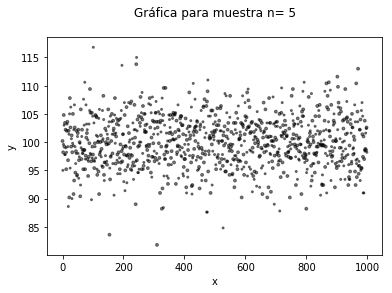

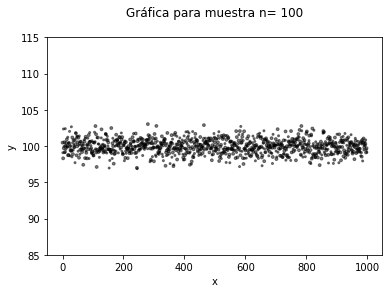

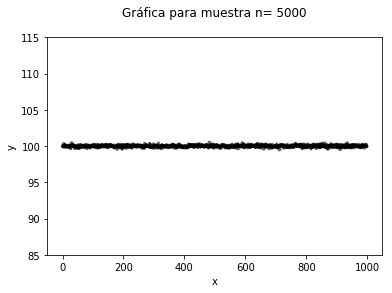

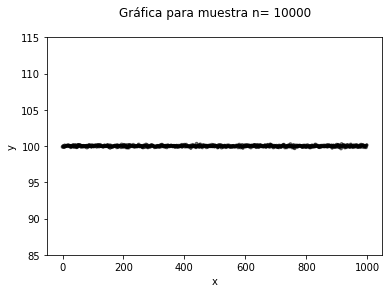

In [35]:
n_aux = 0
colors = (0,0,0)
area = (8,4)
for i in S_mean:
    plt.scatter(list(range(1000)), i, s=area, c=colors, alpha=0.5)
    plt.title('Gráfica para muestra n= '+str(n[n_aux])+"\n")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.yticks(np.arange(85, 120, 5))
    plt.show()
    n_aux+=1


Comparando las gráficas, se puede observar que a mayor cantidad de datos tenga la muestra, menor será la desviación estándar de sus medias. De esta manera, se puede observar en primera instancia un gráfico con gran dispersión y en últimos instancias un gráfico con dispersión visiblemente menor. 

7) Haga un boxplot de cada muestra generada en el inciso 4. ¿Le hace sentido lo que observa con lo que respondió en el inciso 6? Recuerde explayar su respuesta.

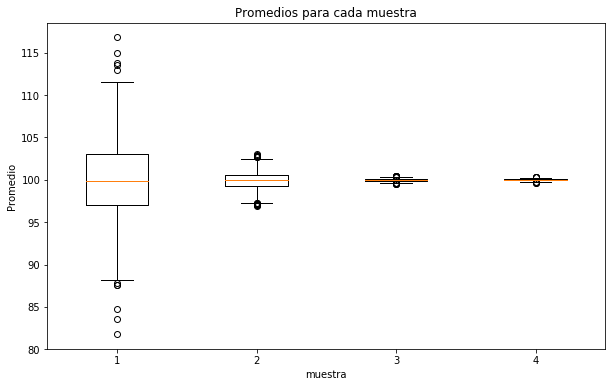

In [36]:
plt.figure(figsize=(10, 6))
plt.boxplot(S_mean)
plt.title('Promedios para cada muestra' + str())
plt.xlabel('muestra')
plt.ylabel('Promedio')
plt.show()  

A partir de estos boxplots se puede observar que a medida que aumenta la cantidad de datos de las muestras (n), los valores de sus medias convergen al valor teórico $\lambda = 100$. De esta manera, se puede observar que en la muestra 1 de n = 5, la mediana se encuentra aproximadamente en el mismo valor que las otras cajas, sin embargo, la distancia entre esta y el primer cuartil(donde se encuentra concentrada un 25% de los datos de la muestra) es mayor que para la caja de la muestra 2 de n=100, y este rango se va haciendo evidentemente menor a medida que se aumentan la cantidad de datos. Se observa el mismo fenómeno para la diferencia entre el tercer cuartil y la mediana, como para los bigotes y outliers de las muestras, a medida que aumenta la cantidad de datos, estos disminuyen en proporción al aumento, manteniéndose la mediana. Estos resultados son consistentes con los scatterplots mostrados en la pregunta anterior.

### 2- Teorema de la Función Inversa 

1) Identificar la función que defina a la variable aleatoria.

$$
f(x) = \left\{
        \begin{array}{ll}
        0 & \quad x < 0 \\
         \frac{\alpha}{\beta^\alpha} x^{\alpha - 1} exp(-(\frac{x}{\beta})^\alpha) & \quad x \geq 0
        \end{array}
    \right.
$$

con $\alpha$,$\beta$ constantes mayores a 0.  

2) De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).

+ Se puede calcular integrando f(x) en el intervalo $[0, x]$ , como se muestra a continuación: 

$$
        \begin{array}{ll}
           F(x)& = \int_{0}^{x} \frac{\alpha}{\beta^\alpha} x^{\alpha - 1} exp(-(\frac{x}{\beta})^\alpha) dx \\
               & = 1 - exp(-(\frac{x}{\beta})^\alpha)
               & \forall x \geq 0 
        \end{array}
$$



+ Para determinar si $F(x)$ es invertible, primero se debe determinar si es inyectiva, es decir:

Si $F(x_1) = F(x_2)$ entonces $x_1 = x_2$

$$         
    \begin{array}{ll}
    1 - exp(-(\frac{x_1}{\beta})^\alpha) &= 1 - exp(-(\frac{x_2}{\beta})^\alpha) \\
            ln(exp(-(\frac{x_1}{\beta})^\alpha)) &= ln(exp(-(\frac{x_2}{\beta})^\alpha)) \\
            ((\frac{x_1}{\beta})^\alpha) &= ((\frac{x_2}{\beta})^\alpha) \\
    \end{array}
$$

Dado el intervalo en que están definidos x y $\beta$, las divisiones que están dentro de los paréntesis siempre serán positivas, por lo tanto, se puede aplicar raíz alfaésima para despejar:

$$         
    \begin{array}{ll}
    \frac{x_1}{\beta} &= \frac{x_2}{\beta} \\
    {x_1} &= {x_2}
    \end{array}
$$

Queda entonces demostrado que $F(x)$ es inyectiva y dado que, en el inciso siguiente es posible determinar su inversa analíticamente sin llegar a alguna contradicción matemática ($F(x)$ es sobreyectiva), se puede afirmar que $F(x)$ es invertible. 

3) De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$

Despejando se obtiene:
    
$$
\begin{array}{ll}
    y &= 1 - exp(-(\frac{x}{\beta})^\alpha \\
    exp(-(\frac{x}{\beta})^\alpha &= 1 - y /ln() \\
    (\frac{x}{\beta})^\alpha &= -ln(1 - y) \\
    x &= \beta [-ln(1 - y)]^{\frac{1}{\alpha}} 
\end{array}
$$

Invirtiendo los ejes y reemplazando los parámetros se tiene:
$$
    y = 3 [-ln(1 - x)]^{\frac{1}{10}} 
$$


4) Generar variables aleatorias sustituyendo valores con números aleatorios en la función acumulada inversa. Recuerde que estos números siguen la distribución $u \sim U(0,1)$.

In [37]:
def inversa_acumulada(value): 
    return((3)*(-(np.log(1-value)))**(1/10))

#Se genera una muestra de valores aleatorios de u
S_uni = np.random.uniform(0,1,10000)
#Se le aplica la acumulada inversa a los valores 
S_inv = [inversa_acumulada(x) for x in S_uni]

5) Genere 10000 valores de $u$ y haga un gráfico de la densidad de dichos valores.

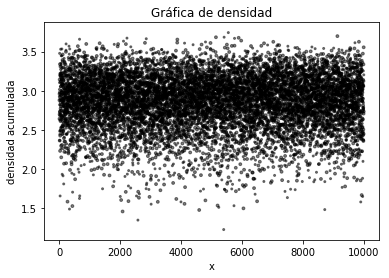

In [38]:
colors = (0,0,0)
area = (8,4)
plt.scatter(list(range(10000)), S_inv, s=area, c=colors, alpha=0.5)
plt.title('Gráfica de densidad acumulada')
plt.xlabel('x')
plt.ylabel('densidad acumulada')
plt.show()
    

6) Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores. 

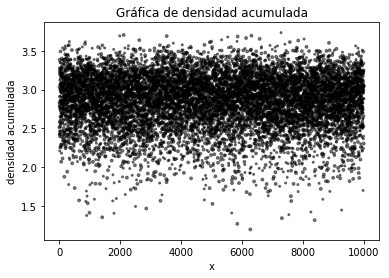

In [40]:
aux = np.random.weibull(10, 10000)   #para generar weibull con un parametro
S_wei = [x * 3 for x in aux]   #para generar weibull con dos parametros


plt.scatter(list(range(10000)), S_wei, s=area, c=colors, alpha=0.5)
plt.title('Gráfica de densidad acumulada')
plt.xlabel('x')
plt.ylabel('densidad acumulada')
plt.show()



7) Concluya respecto a lo que observa en ambas gráficas.

Observando los gráficos se puede percibir que existe una evidente similitud entre las muestras, pese a que una muestra fue generada con la función de densidad acumulada original y la otra con el método basado en el teorema de la función inversa. De este modo, queda demostrado empíricamente el teorema de la función inversa. 

### 3- Teorema del Límite Central 

1) Si se suman todas las $X_{i}$ calcule la media teórica.

In [41]:
#Datos pregunta 1

theta_1 = 0.1
theta_2 = 0.5
theta_3 = 0.2
lambda_1 = 1
lambda_2 = 20
lambda_3 = 50
mu_1 = 10
mu_2 = 20
mu_3 = 40
sigma_1 = 5
sigma_2 = 30
sigma_3 = 50

N=100000

expvalue_theo = theta_1 +theta_2+theta_3+lambda_1+lambda_2+lambda_3+mu_1+mu_2+mu_3


- La media teórica de la suma de los valores esperados corresponde a {{expvalue_theo}}

2) Si se suman todas las $X_{i}$ calcule la varianza teórica.

In [42]:
stddev_theo = theta_1**2 +theta_2**2+theta_3**2+lambda_1+lambda_2+lambda_3+sigma_1+sigma_2+sigma_3

- La desviación estándar teórica corresponde a {{stddev_theo}}

3) ¿Si se suman todas las $X_{i}$ se cumple lo que dice el teorema del límite central?. ¿Los valores empíricos (media y varianza) concuerdan con lo esperado en el inciso 1 y 2 de esta sección?

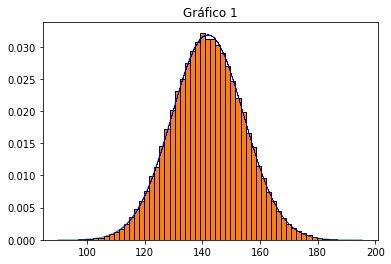

In [43]:
#Muestra X_1

exp1 = np.random.exponential(theta_1,N)
mean_x1 = exp1.mean()
var_x1 = exp1.var()

#Muestra X_2
exp2 = np.random.exponential(theta_2,N)
mean_x2 = exp2.mean()
var_x2 = exp2.var()

#Muestra X_3
exp3 = np.random.exponential(theta_3,N)
mean_x3 = exp3.mean()
var_x3 = exp3.var()

#Muestra X_4
poi1 = np.random.poisson(lambda_1,N)
mean_x4 = poi1.mean()
var_x4 = poi1.var()

#Muestra X_5
poi2 = np.random.poisson(lambda_2,N)
mean_x5 = poi2.mean()
var_x5 = poi2.var()

#Muestra X_6
poi3 = np.random.poisson(lambda_3,N)
mean_x6 = poi3.mean()
var_x6 = poi3.var()

#Muestra X_7 
nor1 = np.random.normal(mu_1,sqrt(sigma_1),N)
mean_x6 = nor1.mean()
var_x6 = nor1.var()

#Muestra X_8 
nor2 = np.random.normal(mu_2,sqrt(sigma_2),N)
mean_x7 = nor2.mean()
var_x7 = nor2.var()

#Muestra X_9 
nor3 = np.random.normal(mu_3,sqrt(sigma_3),N)
mean_x8 = nor3.mean()
var_x8 = nor3.var()

#Suma de las muestras(X_s)
X_s = exp1+exp2+exp3+poi1+poi2+poi3+nor1+nor2+nor3
mean_xs = round(X_s.mean(),2)
var_xs = round(X_s.var(),2)
X_s = sorted(X_s)

fit = stats.norm.pdf(X_s,mean_xs,np.std(X_s))

pl.plot(X_s,fit,'-o',linewidth=0.5, markersize=0.01, mec = 'blue', mfc= 'blue')

pl.hist(X_s,normed=True, edgecolor='black', bins=60)
pl.title('Gráfico 1')
pl.show()
       

- Al realizar la suma de todas las variables aleatorias y calcular el valor esperado se obtiene {{round(mean_xs,2)}}, lo cual concuerda con el valor teórico calculado en el inciso 1, cuyo valor corresponde a, {{expvalue_theo}}
- Del mismo modo, al calcular la varianza se obtiene {{round(var_xs,2)}}, lo que coincide con el valor teórico calculado en el inciso 2, cuyo valor es {{stddev_theo}}.Por lo tanto, se confirma lo postulado por el Teorema del Límite Central, como se puede ver en el Gráfico 1.

4) Exprese $X_{s}$ como una normal estándar. Explique el procedimiento

Para crear la variable aleatoria $X_s$ se generan aleatoriamente, con los parámetros entregados, las poblaciones de todas las variables aleatorias $X_i, i \in [1,9]$ tomando como tamaño de cada población $N = 100000$ y se calcula el valor esperado y la varianza de cada una de las poblaciones. Luego se realiza la suma de las poblaciones de todas las variables, para obtener la población definida por la variable $X_s$ y del mismo modo se suman los valores esperados y varianzas de cada unas de las variables aleatorias $X_i$, teniendo así los valores necesarios para poder modelar la variable $X_s$ que se muestra en el gráfico. 

De esta forma se obtiene $X_s \sim Norm(${{mean_xs}}$,${{var_xs}}$)$



### 4- Estudio de Tiempos de Vida

1) **O:** Explique la utilidad de los gráficos Cuartil-Cuartil y cómo funcionan.

Es un método gráfico cuya función es evidenciar diferencias entre un conjunto de datos(muestra) y una distribución específica, o comparar la distribución de dos muestras. 

2) Utilizando las gráficas cuartil-cuartil determine que modelo se ajusta mejor a la muestra1.

Los modelos son:
+ Distribución Weibull con $\alpha = 40$ y $\beta = 15$
+ Distribución Weibull con $\alpha = 19$ y $\beta = 9$
+ Distribución Weibull con $\alpha = 10$ y $\beta = 20$
+ Distribución Weibull con $\alpha = 15$ y $\beta = 40$
+ Distribución Weibull con $\alpha = 30$ y $\beta = 25$
+ Distribución Weibull con $\alpha = 20$ y $\beta = 10$

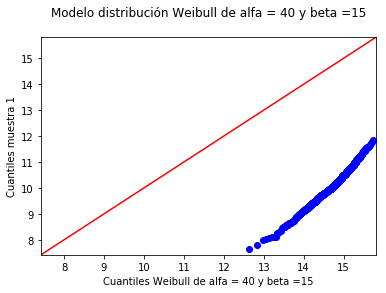

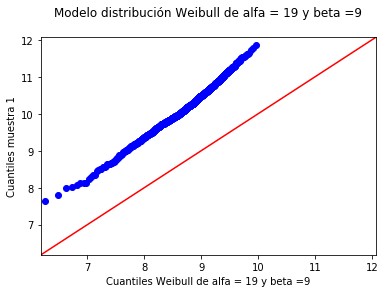

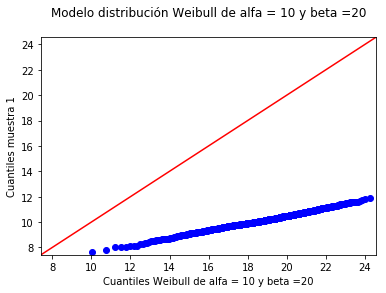

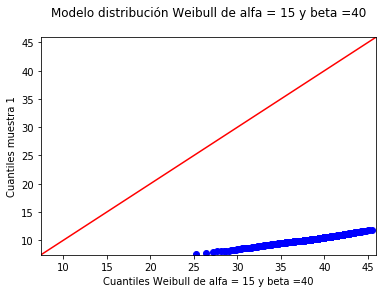

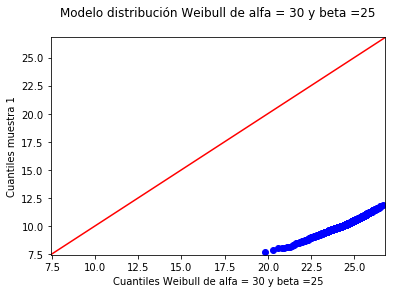

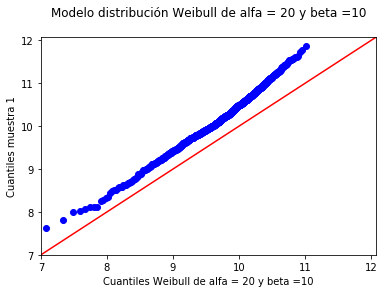

In [44]:
alphas = [40,19,10, 15, 30, 20]
betas = [15, 9, 20, 40, 25, 10]
                                                                
muestra1 = pd.read_csv('muestra1.csv', header=0, encoding='latin1') 


S_csv = np.array(S_csv_aux)
percs = np.linspace(0,100,21)
qn_csv = np.percentile(S_csv, percs)



for i in range(len(alphas)):
    sm.qqplot(muestra1.valor, stats.weibull_min, line = '45', distargs=(alphas[i],), scale = betas[i])
    plt.title('Modelo distribución Weibull de alfa = '+str(alphas[i])+' y beta ='+str(betas[i])+'\n')
    plt.ylabel('Cuantiles muestra 1')
    plt.xlabel('Cuantiles Weibull de alfa = '+str(alphas[i])+' y beta ='+str(betas[i]))
    plt.show()

     


Se puede apreciar que el modelo que más se asemeja es el con distibución Weibull de parámetros $\alpha = 20$ y $\beta = 10$, ya que la curva se ajusta más a la recta $x = y$ que en los otros gráficos cuantil-cuantil. 

3) **O:** Utilizando las gráficas cuartil-cuartil  determine que modelo se ajusta mejor a las muestra2. 

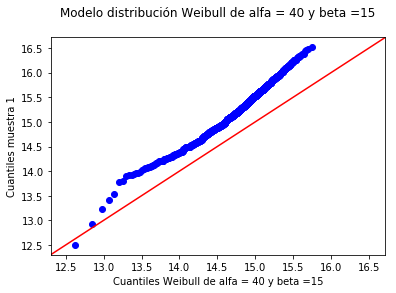

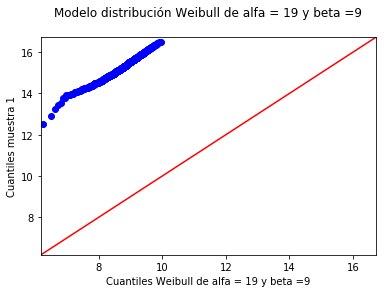

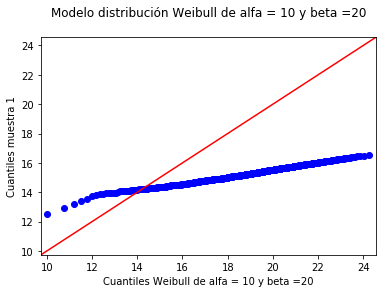

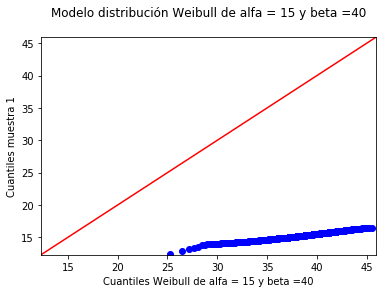

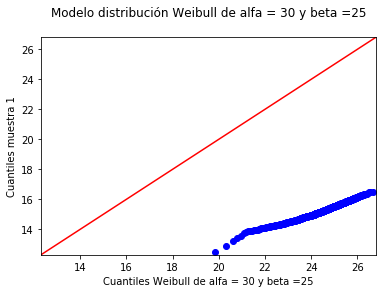

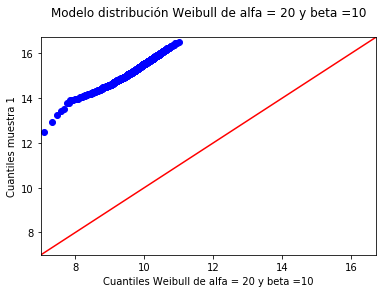

In [21]:
muestra2 = pd.read_csv('muestra2.csv', header=0, encoding='latin1') 


S_csv = np.array(S_csv_aux)
percs = np.linspace(0,100,21)
qn_csv = np.percentile(S_csv, percs)



for i in range(len(alphas)):
    sm.qqplot(muestra2.valor, stats.weibull_min, line = '45', distargs=(alphas[i],), scale = betas[i])
    plt.title('Modelo distribución Weibull de alfa = '+str(alphas[i])+' y beta ='+str(betas[i])+'\n')
    plt.ylabel('Cuantiles muestra 1')
    plt.xlabel('Cuantiles Weibull de alfa = '+str(alphas[i])+' y beta ='+str(betas[i]))
    plt.show()
     


Se puede apreciar que el modelo que más se asemeja es el de distribución Weibull con $\alpha = 40$ y $\beta = 15$.

### 5- Verosimilitud

#### Poisson

In [45]:
#Primera derivada de la log-verosimilitud de Poisson
def lp_prima(lamb, arreglo):
    suma = arreglo['x'].sum()
    retorno = (suma/lamb) - arreglo['x'].count()
    return retorno

#Segunda derivada de la log-verosimilitud de Poisson
def lp_prima2(lamb, arreglo):
    suma = arreglo['x'].sum()
    retorno = -(suma/(lamb)**2)
    return retorno

#Newton-Raphson para la función Gamma    
def n_r_poi(lamb, u, arreglo):
    theta_n = lamb
    theta_n1 = theta_n -(lp_prima(theta_n, arreglo)/lp_prima2(theta_n, arreglo))
    while (abs(theta_n1-theta_n)> u):
        theta_n = theta_n1
        theta_n1 = theta_n -(lp_prima(theta_n, arreglo)/lp_prima2(theta_n, arreglo))
    return theta_n1

poi = pd.read_csv('poi.csv')
lamb_0 = 0.2
umbral = 0.0000001
theta_fp = n_r_poi(lamb_0, umbral, poi)


- El máximo verosimilitud de la distribución de Poisson es {{theta_fp}} 

#### Gamma

In [46]:
#Primera derivada de la log-verosimilitud de gamma
def lg_prima(alfa, largo, arreglo):
    suma = 0
    for i in arreglo['x']:
        suma += log(i)
    retorno = suma - largo*(polygamma(0,alfa))
    return retorno

#Segunda derivada de la log-verosimilitud de gamma
def lg_prima2(alfa, largo):
    retorno = -largo*polygamma(1,alfa)
    return retorno
    
#Newton-Raphson para la función Gamma
def n_r_gamma(alfa, u, largo, arreglo):
    theta_n = alfa
    theta_n1 =  theta_n - (lg_prima(theta_n,largo,arreglo)/lg_prima2(theta_n,largo))
    while (abs(theta_n1-theta_n)> u):
        theta_n = theta_n1
        theta_n1 = theta_n - ((lg_prima(theta_n,largo,arreglo))/(lg_prima2(theta_n,largo)))
    return theta_n1

gama = pd.read_csv('gamma.csv')
alfa_0 = 0.2

largo = len(gama)
theta_fg = n_r_gamma(alfa_0,umbral,largo, gama)


- El máximo verosimilitud de la distribución de Gamma es {{theta_fg}} 